# Project: Ford Bikes

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
>  I have choosen theFord GoBikers, I will Focus on one main questions but each question willd derive more deeper questions
Q1- Compariosn between Male and Female Bikers 
you would think this is a stright forward answer but you will be amazed

# <a id='wrangling'></a>
## Data wrangling

In this section we will import our lib and create a data frame for our Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
df = pd.read_csv('201902-fordgobike-tripdata.csv')

Lets quickly view our Data

In [2]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
# check for data types and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Just to grasp some statistical values of mean and max
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


We have a lot of Data are they all useful
From a quick View I found that we have some Redundant Data ex: (Station Id and Station Name) we only need one of them , Also i dont see a reason for the x, y corrandiants of the Stations but me can plot a nice map of our rides so lets kep it for now

In [6]:
# Removing unneeded columns and adding it to new Data frame df1
df1=df.drop(['start_station_name','end_station_name'],axis=1)
# those columns were dropped as they contained un valuble information to our specific questions
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,37.791464,-122.391034,81.0,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,37.774836,-122.446546,70.0,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Remove Null Values (start_station_id,end_station_id,member_birth_year,member_gender)

In [7]:
df1.dropna(inplace= True)
# can assume Station Ids or genders 

In [9]:
# lets assume this case study was made in 2020
# create a new column with the age instead of birth year
df1["age"]=2020 -df1.member_birth_year

In [10]:
# Dropping the birth Column
df1=df1.drop(['member_birth_year'],axis=1)

In [11]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,Male,No,36.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,Male,No,48.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,37.774836,-122.446546,70.0,37.773311,-122.444293,6638,Subscriber,Other,No,31.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,Male,Yes,46.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,Male,No,61.0


In [12]:
#lets check the Gender column
df1.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [13]:
# This "other" needs to be reomeved as well
df1 = df1[df1.member_gender != "Other"]

In [14]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,Male,No,36.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,Male,No,48.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,Male,Yes,46.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,Male,No,61.0
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,37.317298,-121.884995,312.0,37.329732,-121.901782,3803,Subscriber,Female,No,37.0


In [15]:
# Creating a new column from the Start time to get the start hour
x=[]
for c in df1.start_time:
    x.append(int(c.split('-')[2].split(' ')[1].split(":")[0]))
# Adding the extracted season to the data frame    
df1["start_hour"]=x
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,Male,No,36.0,17
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,Male,No,48.0,12
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,Male,Yes,46.0,23
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,Male,No,61.0,23
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,37.317298,-121.884995,312.0,37.329732,-121.901782,3803,Subscriber,Female,No,37.0,23


In [16]:
# no Need for Start date and end Date now 
df1=df1.drop(['start_time','end_time'],axis=1)


# <a id='eda'></a>
# # Data Exploration plotting

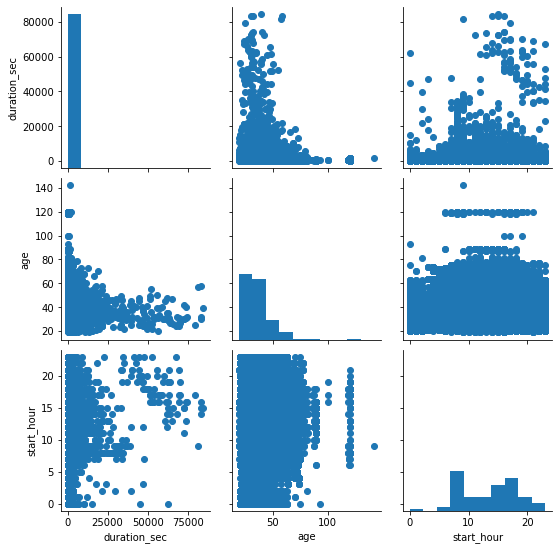

In [18]:
# First lets plot all our numerical Data
g = sb.PairGrid(data = df1,vars=['duration_sec','age','start_hour'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

I know it is better to start with Uni variables then Multi , but this gives me quick overview . Not detailed though
1-there is a positive linear relation between age and durations 
2-There might be a postive relation between start hour and duration

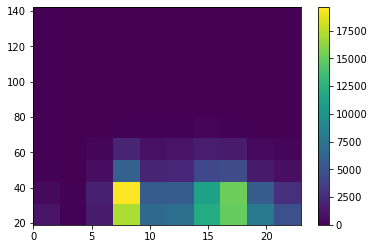

In [19]:
#lets see the relation between start hour and age
plt.hist2d(data = df1, x = 'start_hour', y = 'age');
plt.colorbar()

No realtion can be drawn so far

Lets Explore our Data , I did the Exploratory Plots before choosing my Final questions
Start with some Uni-Variable plots

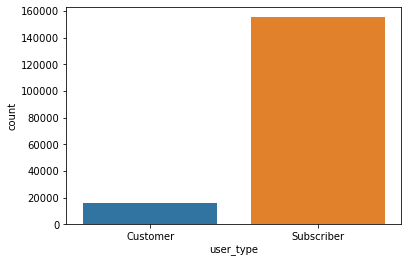

In [20]:
# Staring with user_type 
sb.countplot(data=df1, x='user_type');

Most of our Riders are Subscribers , wow that is Good

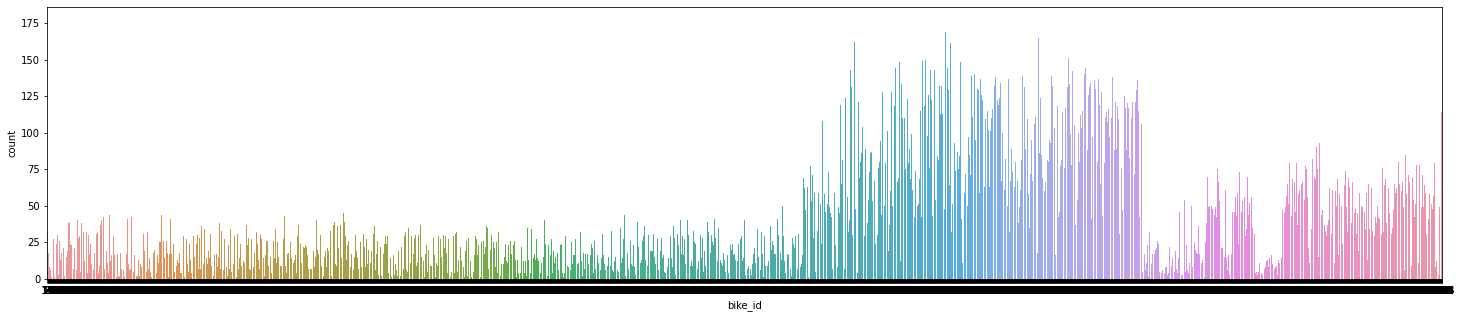

In [21]:
plt.figure(figsize = [25, 5])
sb.countplot(data=df1, x='bike_id');

lets be honest this is a bad plot, but i only wanted to check if all Bikers had the same activity or not, Turns out some bikers rent the bikes more than once

In [22]:
# This supports my theory 
df1.bike_id.value_counts()

4794    177
4814    169
4450    165
5175    165
5145    164
       ... 
3114      1
3234      1
1371      1
3674      1
772       1
Name: bike_id, Length: 4603, dtype: int64

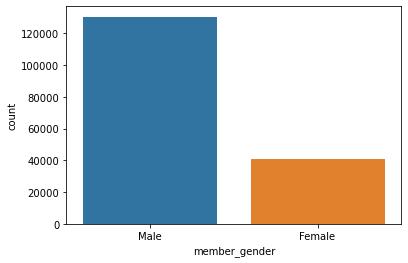

In [23]:
# member_gender 
sb.countplot(data=df1, x='member_gender');

Male are almost 3 times the Female , Are males mor active ! , In explanatory We must take Count into consideration to make fair judgment 

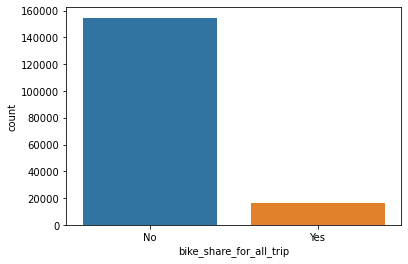

In [24]:
# bike_share_for_all_trip  
sb.countplot(data=df1, x='bike_share_for_all_trip');

Peoplewith Bikes who share are almost negligable 

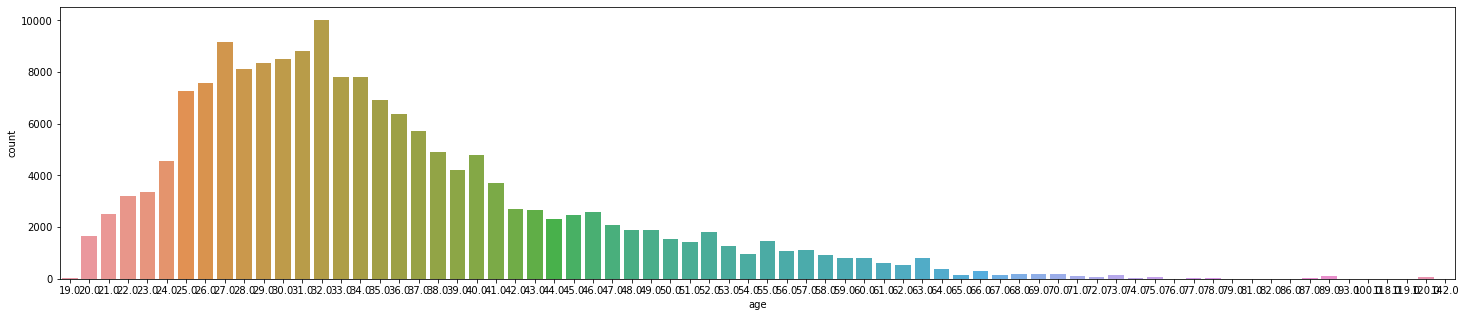

In [25]:
# age
plt.figure(figsize = [25,5])
sb.countplot(data=df1, x='age');

As we can see we have our highest density from ages 24 till 36 , plot must be inhanced in explanatory Analysis. seems to be a bimodel though, we have some outliers that need to be removed , More in the Explantory analysis

<BarContainer object of 2 artists>

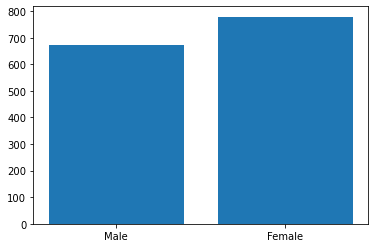

In [26]:
#Gender VS duration
Male_dur=df1.query("member_gender == 'Male'")['duration_sec'].mean()
Female_dur=df1.query("member_gender == 'Female'")['duration_sec'].mean()
x=["Male","Female"]
y=[Male_dur,Female_dur]
plt.bar(x,y)


Female seems to have more stamina then men 

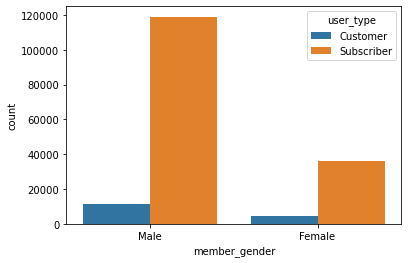

In [27]:
# Gender Vs user Type
sb.countplot(data = df1, x = 'member_gender', hue = 'user_type');


This plot is not fair at all as we need to take the counts of Males and Females into considerations, will fix that in the explanatory part

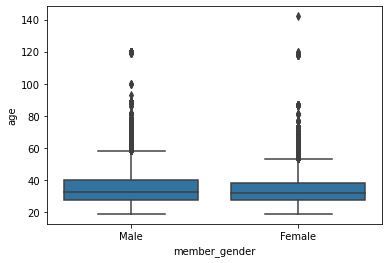

In [28]:
# Gender Vs age 
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='member_gender', y='age', color=base_color)

We have more older males then females , the mean is very close though , we have some outliers will be fixed in the explanatory part

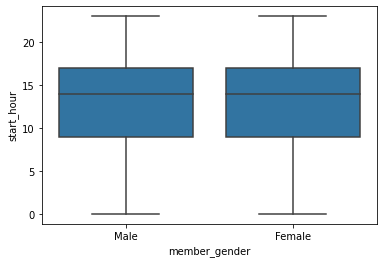

In [29]:
# Gender Vs Start Hour
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='member_gender', y='start_hour', color=base_color)


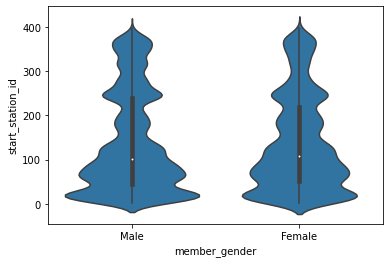

In [30]:
# Gender vs Station Id start_station_id
sb.violinplot(data=df1, x='member_gender', y='start_station_id', color=base_color, innner=None)



The distribution of Male and female seems to be not equally distributed among Stations 
Stations Id below 150 have more ditributions than others

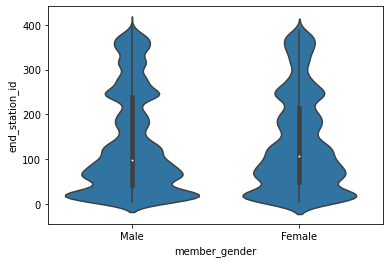

In [31]:
sb.violinplot(data=df1, x='member_gender', y='end_station_id', color=base_color, innner=None)


End station id seems to be almost the same as the statrt station ids,
Stations Id below 150 have more ditributions than others

Lets concolude with some Multi Variate Plots

H:\Progs\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


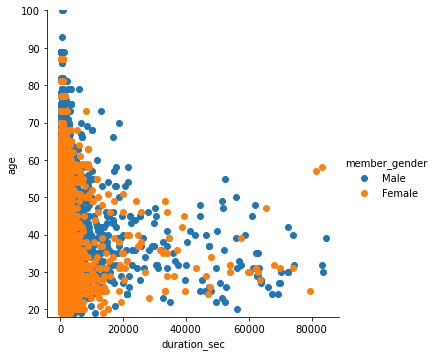

In [32]:
g = sb.FacetGrid(data = df1, hue = 'member_gender', size = 5)
g.map(plt.scatter, 'duration_sec', 'age')
g.add_legend()
plt.ylim((18,100));


As we can sea in this plot 
-as age increase Duration decreases for both Males and Females 
-Also we can see that men has higher age than women
-Desity is Decreasing as Duration Increase

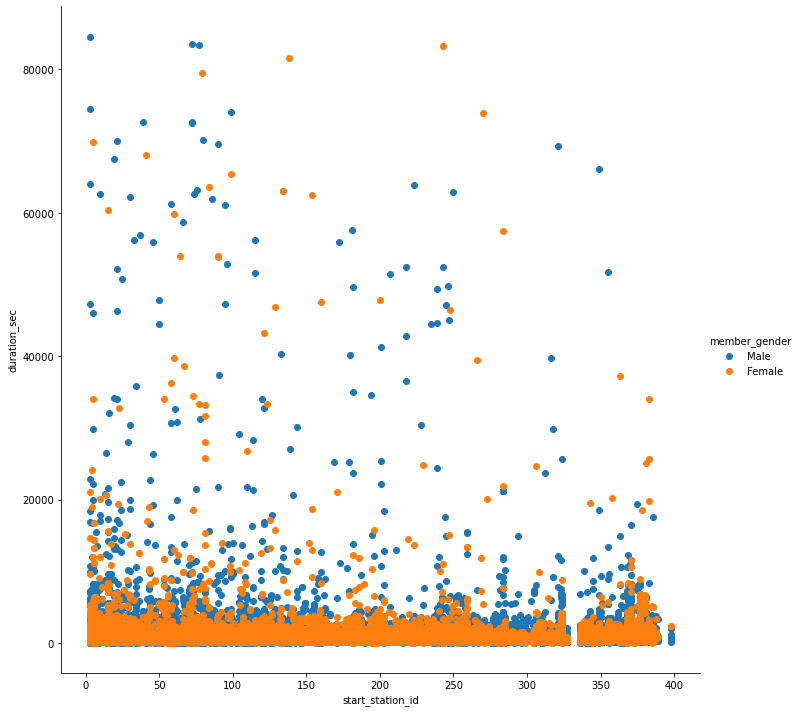

In [33]:
# lets try to find out a relation between gender , Station id and duration
g = sb.FacetGrid(data = df1, hue = 'member_gender', size = 10)
g.map(plt.scatter, 'start_station_id','duration_sec')
g.add_legend()

I cant find any real realationship between these variables

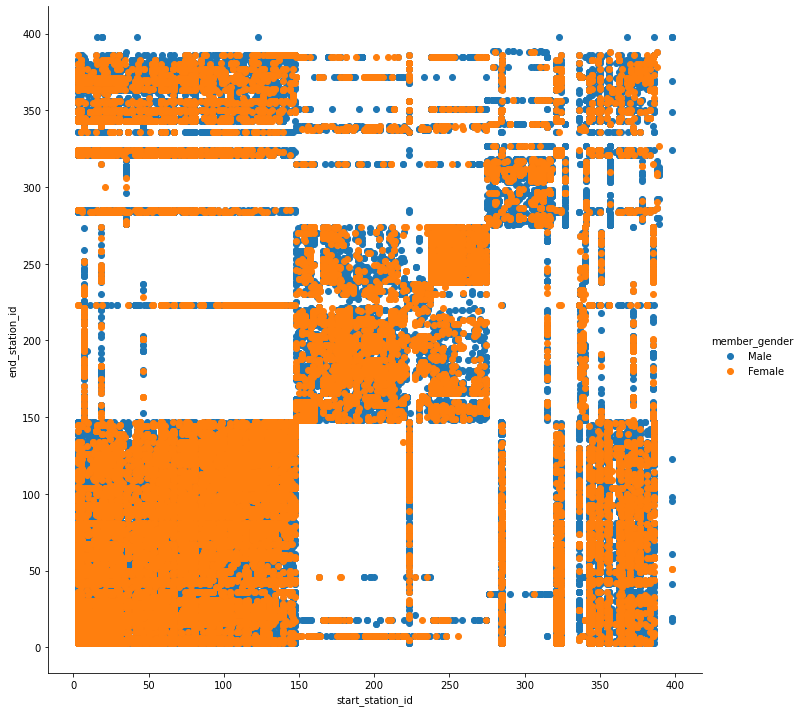

In [34]:
# Finally lets try to find out a relation between gender , Start_Station id and end station ID
g = sb.FacetGrid(data = df1, hue = 'member_gender', size = 10)
g.map(plt.scatter, 'start_station_id','end_station_id')
g.add_legend()

I know this looks very strange and abnormal , 
-but there is a relation between the Start and end Stations, you can find some Stations has high density and some have zero 
-the Distribution is like a boxes which can tell us that Start Station is always closer than the end Station in terms of IDs
this can tell us that Stations are ordered geographically

# <a id='conclusions'></a>
## Conclusion 


This will be a brief conclusion as i will leave the details in the Explanatory story
1-There is a strong relation between age and duration 
2-More Males are bikers than Female, although we only have the data of one month so not a very sronmg sample
3-Some Station are prefered by people than others 
4- Most of the riders are subscribers but most of them dont share the Bike, again we have a sample of only one month so this might not be very acuurate. More Data inshighs will be in the Explaintory part